#### 📊 compare models.ipynb

In [1]:
import sys
import os
# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
from utils.paths import MODELS_DIR, DATA_DIR, ARCHITECTURES_DIR

In [2]:
import numpy as np

In [3]:
from utils.visualization import build_comparison_table, plot_model_comparison, plot_confusion_matrix
from utils.data_utils import evaluate_all_models_on_test

from utils.visualization import plot_val_vs_test_acc, plot_dropout_vs_overfit, plot_efficiency, plot_group_accuracy, print_per_class_accuracy

,Model,Type,Architecture,Epoch (best),Train Acc,Val Acc,Overfit Gap,Val Loss,Avg Epoch Time (s),LR,Dropout,Optimizer,Converged by Epoch,Stability (val acc)
0,cnn_bn_32_64_128_fc512_256_aug_sched,CNN,"conv: 3, fc: 2",71,0.823600,0.807300,0.016300,0.586600,27.680000,0.000500,"[0.5, 0.3]",Adam,21,0.002100
1,cnn_mixup_cutout_SGD,CNN,"conv: 4, fc: 2",77,0.418600,0.798200,-0.379600,1.018600,28.180000,0.010000,"[0.5, 0.3]",SGD,31,0.003600
2,cnn_bn_32_64_128_fc_512_256_aug,CNN,"conv: 3, fc: 2",83,0.816700,0.796900,0.019800,0.612700,34.250000,0.000500,"[0.5, 0.3]",Adam,18,0.003300
3,cnn_bn_32_64_128_256_fc512_256_aug_sched_SGD,CNN,"conv: 4, fc: 2",13,0.998300,0.770500,0.227800,1.083100,16.630000,0.010000,"[0.5, 0.3]",SGD,3,0.001000
4,cnn_advanced,CNN,"conv: 3, fc: 2",12,0.835000,0.744300,0.090700,0.804000,24.030000,0.000500,"[0.5, 0.3]",Adam,5,0.003800
5,cnn_64_128_256_fc_512,CNN,"conv: 3, fc: 1",16,0.978700,0.744200,0.234500,1.445000,24.460000,0.000500,[0.4],Adam,3,0.002400
6,cnn_bn_32_64_128_fc_512_256,CNN,"conv: 3, fc: 2",11,0.932100,0.725400,0.206700,1.003600,25.990000,0.000500,"[0.5, 0.3]",Adam,2,0.006500
7,cnn_test,CNN,"conv: 2, fc: 2",12,0.847100,0.722200,0.124900,0.881400,24.420000,0.001000,"[0.3, 0.3]",Adam,3,0.003900
8,cnn_bn_32_64_128_fc_512_256_gs,CNN,"conv: 3, fc: 2",11,0.913300,0.697900,0.215400,1.056400,26.400000,0.000500,"[0.5, 0.3]",Adam,2,0.006600
9,fc_1024_512_256,FC,fc: 3,28,0.703400,0.578700,0.124700,1.268500,23.610000,0.010000,"[0.3, 0.3, 0.3]",SGD,6,0.006100


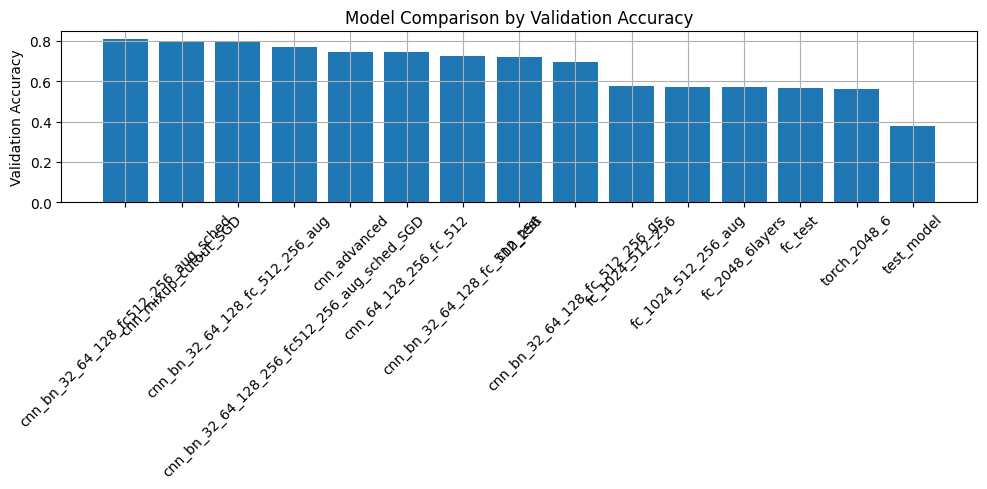

In [4]:
df_models = build_comparison_table(models_dir=MODELS_DIR).sort_values(by="Val Acc", ascending=False)
styled_df_models = df_models.style.bar(subset=["Val Acc", "Train Acc", "Overfit Gap", "Stability (val acc)"], color='lightblue')
display(styled_df_models)

plot_model_comparison(df_models)

In [5]:
test_results, class_names = evaluate_all_models_on_test(models_dir=MODELS_DIR, force=False, save_predictions=True)

for model_name, metrics in test_results.items():
    if model_name in df_models["Model"].values:
        df_models.loc[df_models["Model"] == model_name, "Test Acc"] = round(metrics["accuracy"], 4)
        df_models.loc[df_models["Model"] == model_name, "Test Loss"] = round(metrics["loss"], 4)

------------------------------------------------------------
Evaluating cnn_64_128_256_fc_512...
------------------------------------------------------------
✅ Test results already exist for cnn_64_128_256_fc_512.. loading from c:\Users\pbori\Documents\ML AI Courses\Homework\CIFAR10_Torch_Classifier\models\cnn_64_128_256_fc_512\cnn_64_128_256_fc_512_test.json
------------------------------------------------------------
Evaluating cnn_advanced...
------------------------------------------------------------
✅ Test results already exist for cnn_advanced.. loading from c:\Users\pbori\Documents\ML AI Courses\Homework\CIFAR10_Torch_Classifier\models\cnn_advanced\cnn_advanced_test.json
------------------------------------------------------------
Evaluating cnn_bn_32_64_128_256_fc512_256_aug_sched_SGD...
------------------------------------------------------------
🧪 Creating transform pipeline...
🧪 Transform pipeline:
  └─ Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=

,Model,Type,Architecture,Epoch (best),Train Acc,Val Acc,Overfit Gap,Val Loss,Avg Epoch Time (s),LR,Dropout,Optimizer,Converged by Epoch,Stability (val acc),Test Acc,Test Loss
0,cnn_bn_32_64_128_fc512_256_aug_sched,CNN,"conv: 3, fc: 2",71,0.823600,0.807300,0.016300,0.586600,27.680000,0.000500,"[0.5, 0.3]",Adam,21,0.002100,0.844700,0.452000
1,cnn_mixup_cutout_SGD,CNN,"conv: 4, fc: 2",77,0.418600,0.798200,-0.379600,1.018600,28.180000,0.010000,"[0.5, 0.3]",SGD,31,0.003600,0.835700,0.914700
2,cnn_bn_32_64_128_fc_512_256_aug,CNN,"conv: 3, fc: 2",83,0.816700,0.796900,0.019800,0.612700,34.250000,0.000500,"[0.5, 0.3]",Adam,18,0.003300,0.830900,0.490000
3,cnn_bn_32_64_128_256_fc512_256_aug_sched_SGD,CNN,"conv: 4, fc: 2",13,0.998300,0.770500,0.227800,1.083100,16.630000,0.010000,"[0.5, 0.3]",SGD,3,0.001000,0.758400,1.103500
5,cnn_64_128_256_fc_512,CNN,"conv: 3, fc: 1",16,0.978700,0.744200,0.234500,1.445000,24.460000,0.000500,[0.4],Adam,3,0.002400,0.733400,0.786600
4,cnn_advanced,CNN,"conv: 3, fc: 2",12,0.835000,0.744300,0.090700,0.804000,24.030000,0.000500,"[0.5, 0.3]",Adam,5,0.003800,0.723000,0.806100
7,cnn_test,CNN,"conv: 2, fc: 2",12,0.847100,0.722200,0.124900,0.881400,24.420000,0.001000,"[0.3, 0.3]",Adam,3,0.003900,0.711200,0.849300
6,cnn_bn_32_64_128_fc_512_256,CNN,"conv: 3, fc: 2",11,0.932100,0.725400,0.206700,1.003600,25.990000,0.000500,"[0.5, 0.3]",Adam,2,0.006500,0.693600,0.874500
8,cnn_bn_32_64_128_fc_512_256_gs,CNN,"conv: 3, fc: 2",11,0.913300,0.697900,0.215400,1.056400,26.400000,0.000500,"[0.5, 0.3]",Adam,2,0.006600,0.690000,0.911000
11,fc_2048_6layers,FC,fc: 6,30,0.768200,0.571100,0.197100,1.412500,17.280000,0.001000,"[0.3, 0.3, 0.3, 0.3, 0.3, 0.3]",Adam,7,0.003100,0.570400,1.287500


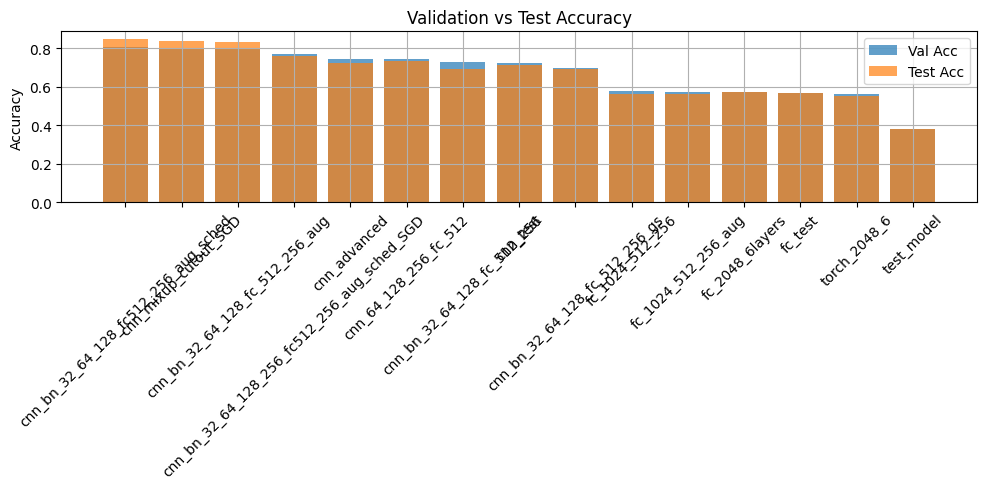

In [6]:
styled_df_models = df_models.sort_values(by="Test Acc", ascending=False).style.bar(subset=["Val Acc", "Train Acc", "Test Acc"], color='lightblue')
display(styled_df_models)
plot_val_vs_test_acc(df_models)

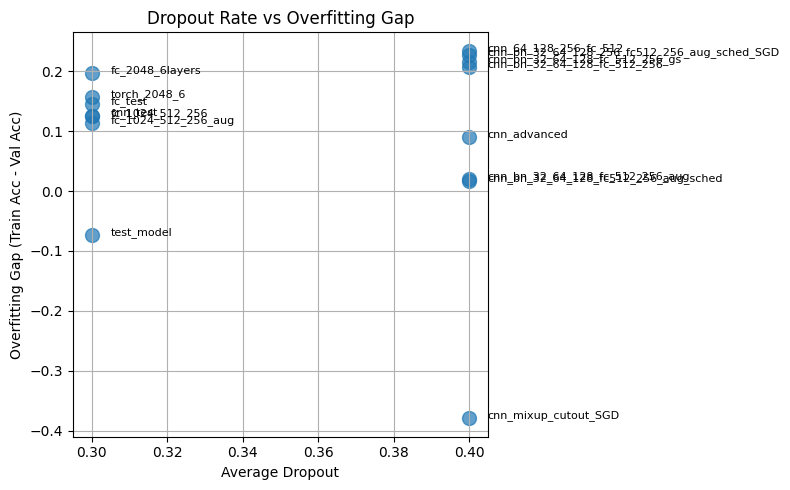

In [7]:
df_models["Dropout Avg"] = df_models["Dropout"].apply(lambda d: np.mean(eval(d)) if isinstance(d, str) else np.nan)
plot_dropout_vs_overfit(df_models)

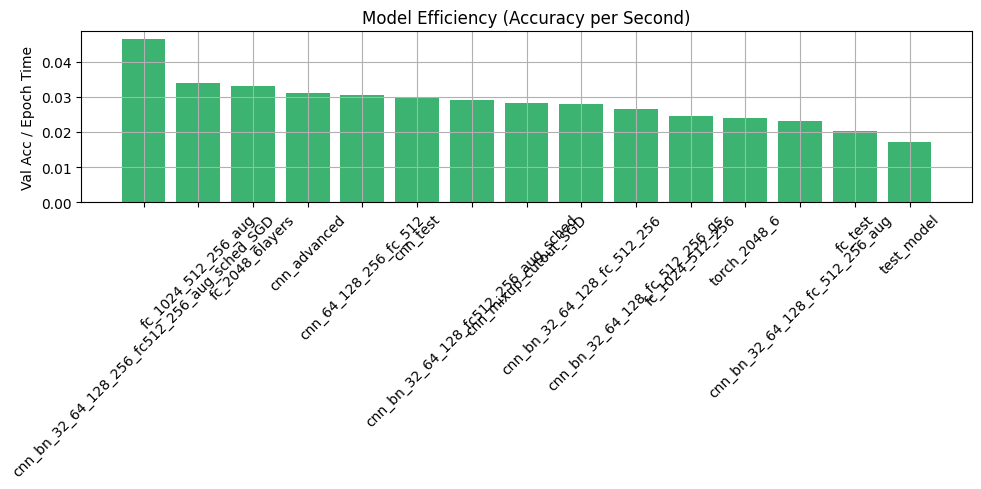

In [8]:
df_models["Efficiency"] = df_models["Val Acc"] / df_models["Avg Epoch Time (s)"]

plot_efficiency(df_models)

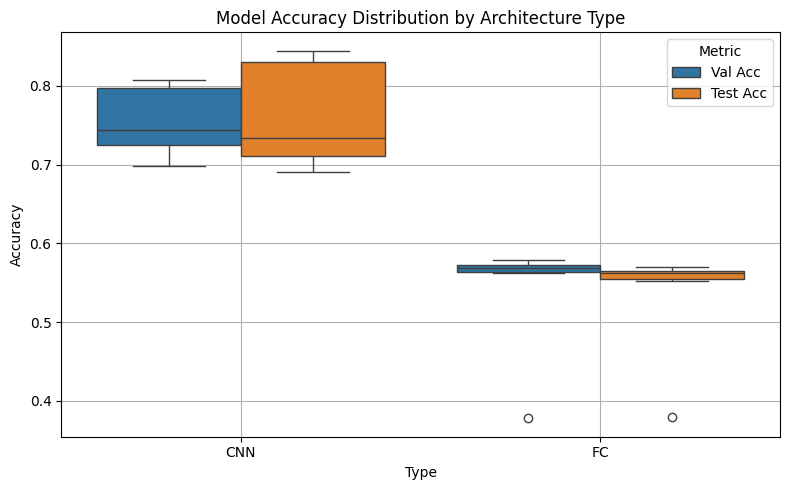

In [9]:
plot_group_accuracy(df_models)

In [10]:
print("List of models:")
display(test_results.keys())

List of models:


dict_keys(['cnn_64_128_256_fc_512', 'cnn_advanced', 'cnn_bn_32_64_128_256_fc512_256_aug_sched_SGD', 'cnn_bn_32_64_128_fc512_256_aug_sched', 'cnn_bn_32_64_128_fc_512_256', 'cnn_bn_32_64_128_fc_512_256_aug', 'cnn_bn_32_64_128_fc_512_256_gs', 'cnn_mixup_cutout_SGD', 'cnn_test', 'fc_1024_512_256', 'fc_1024_512_256_aug', 'fc_2048_6layers', 'fc_test', 'test_model', 'torch_2048_6'])

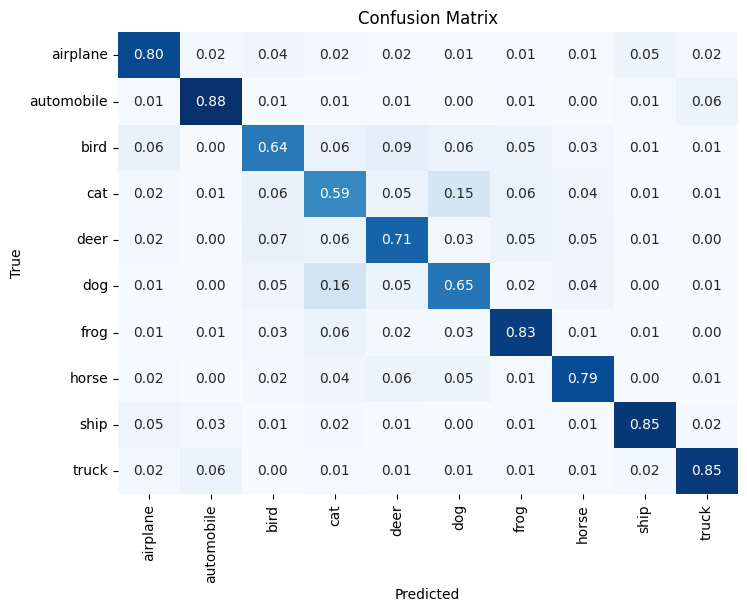

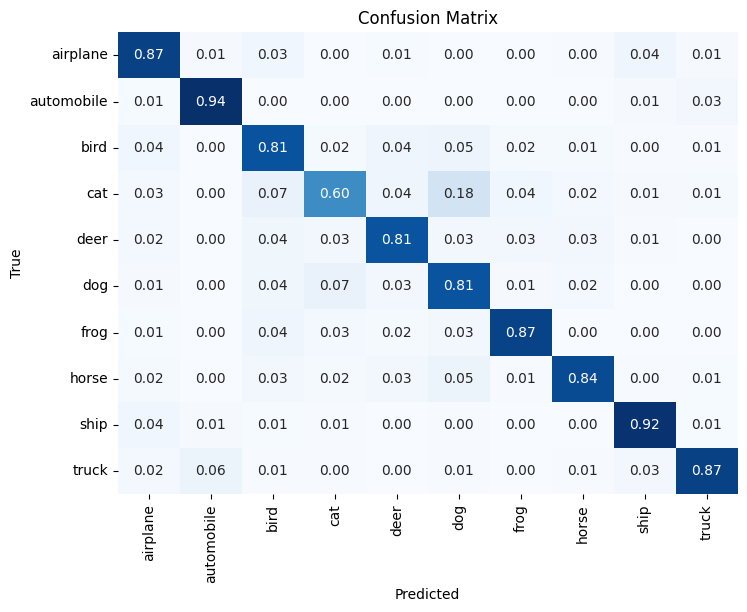

📊 {model1_name} — per-class accuracy:
              precision    recall  f1-score   support

    airplane     0.7826    0.7990    0.7907      1000
  automobile     0.8707    0.8820    0.8763      1000
        bird     0.6876    0.6360    0.6608      1000
         cat     0.5663    0.5890    0.5775      1000
        deer     0.6999    0.7090    0.7044      1000
         dog     0.6549    0.6470    0.6509      1000
        frog     0.7928    0.8340    0.8129      1000
       horse     0.8109    0.7890    0.7998      1000
        ship     0.8667    0.8520    0.8593      1000
       truck     0.8538    0.8470    0.8504      1000

    accuracy                         0.7584     10000
   macro avg     0.7586    0.7584    0.7583     10000
weighted avg     0.7586    0.7584    0.7583     10000

📊 {model2_name} — per-class accuracy:
              precision    recall  f1-score   support

    airplane     0.8184    0.8740    0.8453      1000
  automobile     0.9115    0.9370    0.9241      1000
  

In [12]:
model1_name = "cnn_bn_32_64_128_256_fc512_256_aug_sched_SGD"
model2_name = "cnn_mixup_cutout_SGD"

# confusion matrix
plot_confusion_matrix(test_results[model1_name]["y_pred"],
        test_results[model1_name]["y_true"],
        class_names=class_names,
        normalize=True,
        model_name=model1_name)

plot_confusion_matrix(test_results[model2_name]["y_pred"],
        test_results[model2_name]["y_true"],
        class_names=class_names,
        normalize=True,
        model_name=model2_name)

# reports
print("📊 {model1_name} — per-class accuracy:")
print_per_class_accuracy(test_results[model1_name]["y_true"],
        test_results[model1_name]["y_pred"],
        class_names)

print("📊 {model2_name} — per-class accuracy:")
print_per_class_accuracy(test_results[model2_name]["y_true"],
        test_results[model2_name]["y_pred"],
        class_names)
